In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

%load_ext autoreload
%autoreload 2

## $\Upsilon$-comparison plot

In [2]:
betalims = np.logspace(-4., 1, 1000)

In [3]:
ys = [None] * 3

for i, runid in enumerate([13, 15, 14]):
    data = GSHEWaveform.read_shooting(runid, "../data", 0.15)
    dk = data["xs"][1] - data["xs"][0]
    grid = data["grid"]
    betas = data["betas"]
    hull = GSHEWaveform.build_shadowhull(grid, betas[:, 0], N=200)
    vals = GSHEWaveform.fillshadow(grid, betas[:, 0], hull)
    
    
    ys[i] = GSHEWaveform.get_upsilon(grid, vals, betalims, dk)
    
    



Eliminating 193 point due to beta with average 0.9378 loops.


/Users/richard/Projects/birefringence/paper_plots/../GSHEWaveform/shadow.py:64: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))


Eliminating 126 point due to beta with average 0.6984 loops.
Eliminating 83 point due to beta with average 0.7711 loops.


<IPython.core.display.Javascript object>


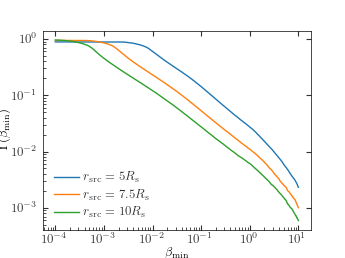

In [4]:
GSHEWaveform.setmplstyle("../plot_style.txt")

plt.figure()

# plt.axvline(1, c="black", alpha=0.5)
plt.plot(betalims, ys[0], label=r"$r_{\rm src}=5 R_{\rm s}$")
plt.plot(betalims, ys[1], label=r"$r_{\rm src}=7.5 R_{\rm s}$")
plt.plot(betalims, ys[2], label=r"$r_{\rm src}=10 R_{\rm s}$")


plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.legend()

plt.savefig("/Users/richard/Downloads/upsilons.pdf", dpi=450, bbox_inches="tight")
plt.show()

<IPython.core.display.Javascript object>


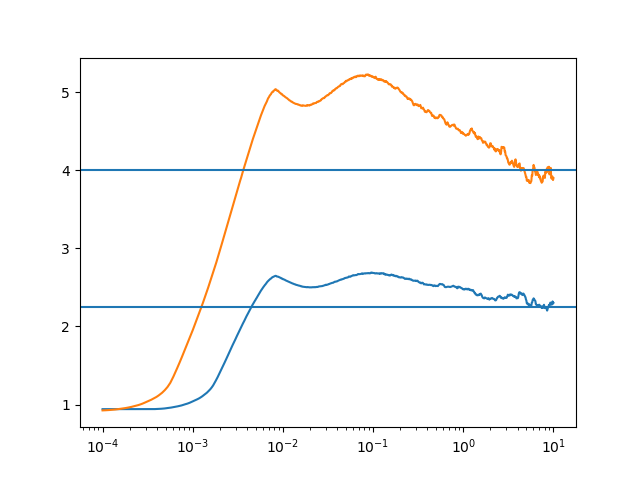

In [22]:
GSHEWaveform.setmplstyle()

plt.figure()

# label=r"$r_{\rm src}=5 R_{\rm s}$"
plt.plot(betalims, ys[0] / ys[1])
plt.plot(betalims, ys[0] / ys[2])

plt.xscale("log")
plt.axhline(2**2)
plt.axhline((7.5/5)**2)

plt.savefig("/Users/richard/Downloads/ratios.png", dpi=300)
plt.show()